<a href="https://colab.research.google.com/github/watikarosm/sarkar-computer-vision-lectures/blob/main/CV_Module_1_3_Pixel_operations_color_histogram_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, 2022, Sudeep Sarkar, University of South Florida, Tampa

# Photometric Manipulation

* You will learn how to change an image's appearance by changing the value of an image pixel. We can use these operations to change the image's photometric properties, such as brightness,  contrast, and color.

* We will go over the code that implements the pixel operations. You will learn how to code in python to manipulate color and contrast.

* You will learn about a standard contrast adjustment method called histogram equalization. First, you will learn about a histogram; then, you will see the mathematics behind the ideas, followed by an algorithm behind the concept. Lastly, we will see it implemented in code.


# Pixel Operations

* Section 3.1 (second edition)

* **Image processing operator**, $h$,  is a function that takes an input image $f(i, j)$ and produces an output image $g(i, j)$:

>> $g(i, j) = h (f(i, j))$

* Some common transformations

>> 1. **Contrast and brightness modulation**: $g(i, j) = a f(i, j) + b$, where $a$ is called the *gain* with $a > 0$ and $b$ is called the bias.

>> 2. **Graded density filter**: $g(i, j) = a(i, j) f(i, j) + b (i, j)$, where the gain and the bias are spatially varying. Artists used this to correct old photographs, which were darker towards the edge than at the middle. In photography, physical optical filters perform this task to create stunning outdoor pictures.

>> 3. **Linear blend operator**: Used to perform a temporal cross-dissolve between two images or videos, as seen in slide shows and film production, or as a component of image morphing algorithms.

\begin{equation}
g(i, j) = (1 - \alpha) f_0 (i, j) + \alpha f_1 (i, j)
\end{equation}

>>>Varying $\alpha$ from 0 to 1 changes the blend gradually.

>> 4. **Gamma correction**: sometimes used to remove the non-linear mapping between input radiance and quantized pixel values.

\begin{equation}
g(i, j) = [f(i, j)]^\frac{1}{\gamma}
\end{equation}

>>> A gamma value of 2.2 is a good fit for most digital cameras.



##Code: Initialization.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io  #has functions to read and write images
from skimage import color as change # contains function to change between color spaces

import cv2  # OpenCV - https://opencv.org/

np.set_printoptions(precision=2)

In [24]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/'
!ls "$data_dir"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 0005_Walking001.xlsx			     kellog.jpg
 0008_ChaCha001.xlsx			     left01.jpg
 20211003_082148.jpg			     left02.jpg
 20211003_082201.jpg			     left03.jpg
 apple.jpg				     left04.jpg
'Armes 1.png'				     left05.jpg
'Armes 2.png'				     left06.jpg
 blog_danforth_monica_mural_panorama.jpg     left07.jpg
 blog_monica_mural_brown_white.jpg	     left08.jpg
 blog_monica_mural_fish_tree_windows1.jpg    left09.jpg
'cats and dogs.jpg'			     left11.jpg
 convenience-store-cereal01.jpg		     left12.jpg
 declaration_of_independence_stone_630.jpg   lizard.jpg
 Fig3_3a.jpg				     MOT16-08-raw.webm
 Fig3_4a.jpg				     mountain_peak_1.png
 Fig3_4c.jpg				     mountain_peak_2.png
 hawaii.png				     parking_lot_meva_1.png
 house_1.png				     parking_lot_meva_2.png
 house_2.png				     parking_lot_meva_3.png
 house_facade.png			    'Superbowl 2021_1.png'
 IMG_0185.jpg

## Code: Pixel Operations

Text(0.5, 1.0, 'Gamma corrected image')

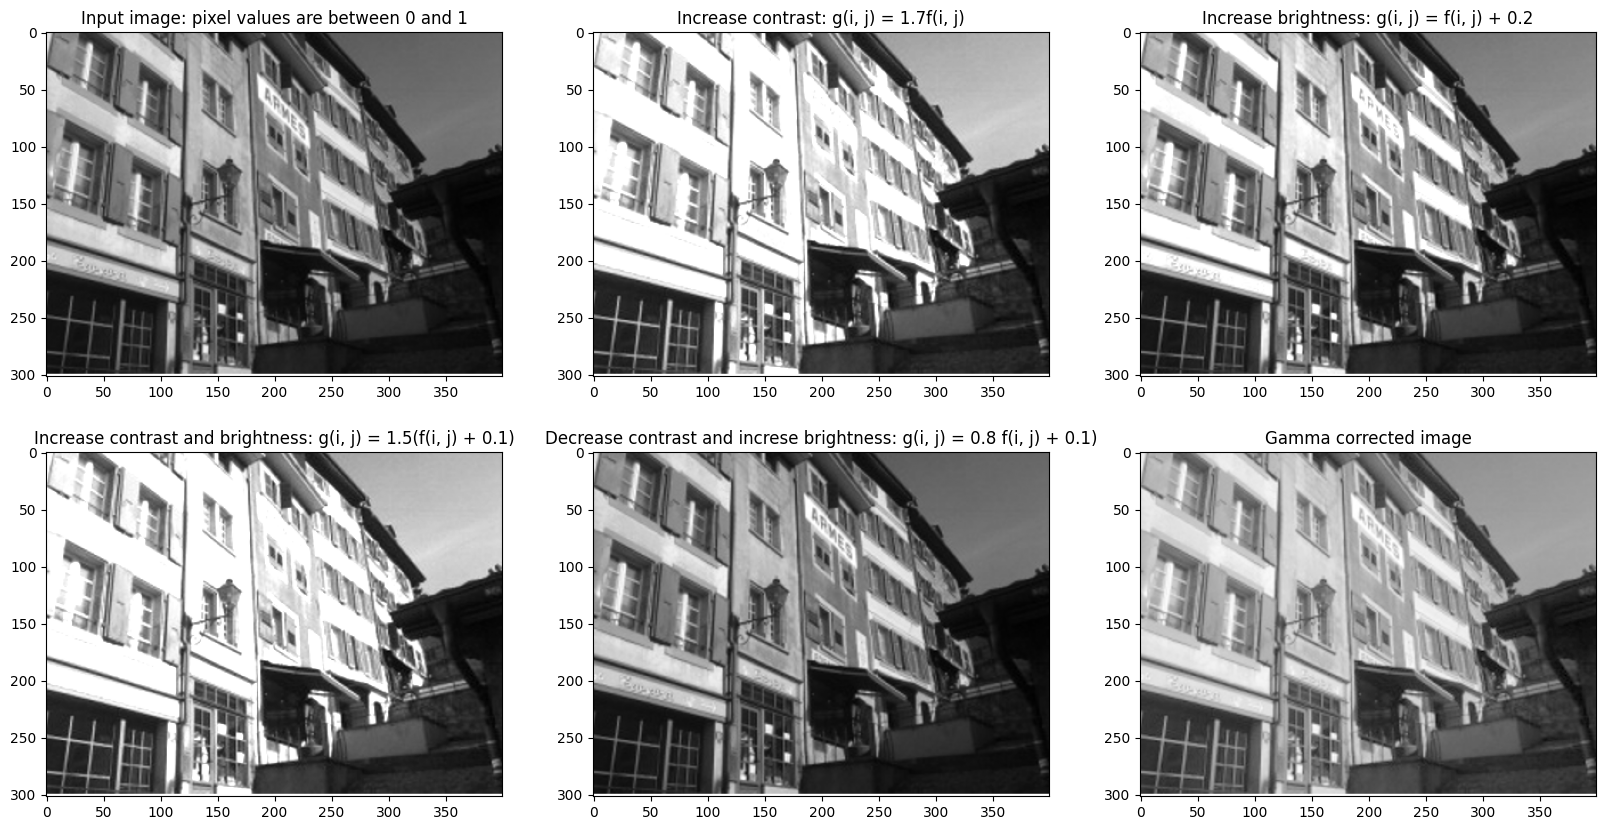

In [25]:
def change_contrast (input_im, a) :
# Note this function will work for the case when a is a constant and also when
# a is an array with spatially variant values over the image locations
# Assumes the image pixel values range between 0 and 1.
    out_im = a * input_im  # This is NOT matrix multiply when a is a matrix. It is elementwise multiplication.
    out_im = np.where(out_im > 1, 1, out_im) # clip the intensity to max 1
    out_im = np.where(out_im < 0, 0, out_im) # clip the intensity to min 0
    return (out_im)

def change_brightness(input_im, b) :
    out_im = input_im + b
    out_im = np.where(out_im > 1, 1, out_im) # clip the intensity to max 1
    out_im = np.where(out_im < 0, 0, out_im) # clip the intensity to min 0
    return (out_im)

def linear_blend (input_im1, input_im2, alpha) :
    return ((1-alpha)*input_im1 + alpha * input_im2)

def gamma_correction (input_im, gamma) :
    return (np.power(input_im, 1/gamma))


#----------------------------------------------------------------------------------
# Load an color image in grayscale
img = io.imread(data_dir+'Armes 1.png')
img = change.rgb2gray(change.rgba2rgb(img))
# RGBA is a four-channel format containing data for Red, Green, Blue, and an Alpha value.

img = img.astype(float)  # need to change type from uint8 to float

#--------------------Display functions----------------------------------------
fig, axs = plt.subplots(2, 3)
fig.set_size_inches (20, 10)
axs[0,0].imshow(img, 'gray');
axs[0,0].set_title('Input image: pixel values are between 0 and 1')

axs[0,1].imshow(change_contrast(img, 1.7), 'gray');
axs[0,1].set_title('Increase contrast: g(i, j) = 1.7f(i, j)')

axs[0,2].imshow(change_brightness(img, 0.2), 'gray');
axs[0,2].set_title('Increase brightness: g(i, j) = f(i, j) + 0.2')

axs[1,0].imshow(change_contrast(change_brightness(img, 0.1), 1.5), 'gray');
axs[1,0].set_title('Increase contrast and brightness: g(i, j) = 1.5(f(i, j) + 0.1)')

axs[1,1].imshow(change_brightness(change_contrast(img, 0.8), 0.1), 'gray');
axs[1,1].set_title('Decrease contrast and increse brightness: g(i, j) = 0.8 f(i, j) + 0.1)')

axs[1,2].imshow(gamma_correction(img, 2.2), 'gray');
axs[1,2].set_title('Gamma corrected image')


##Code: Blending images

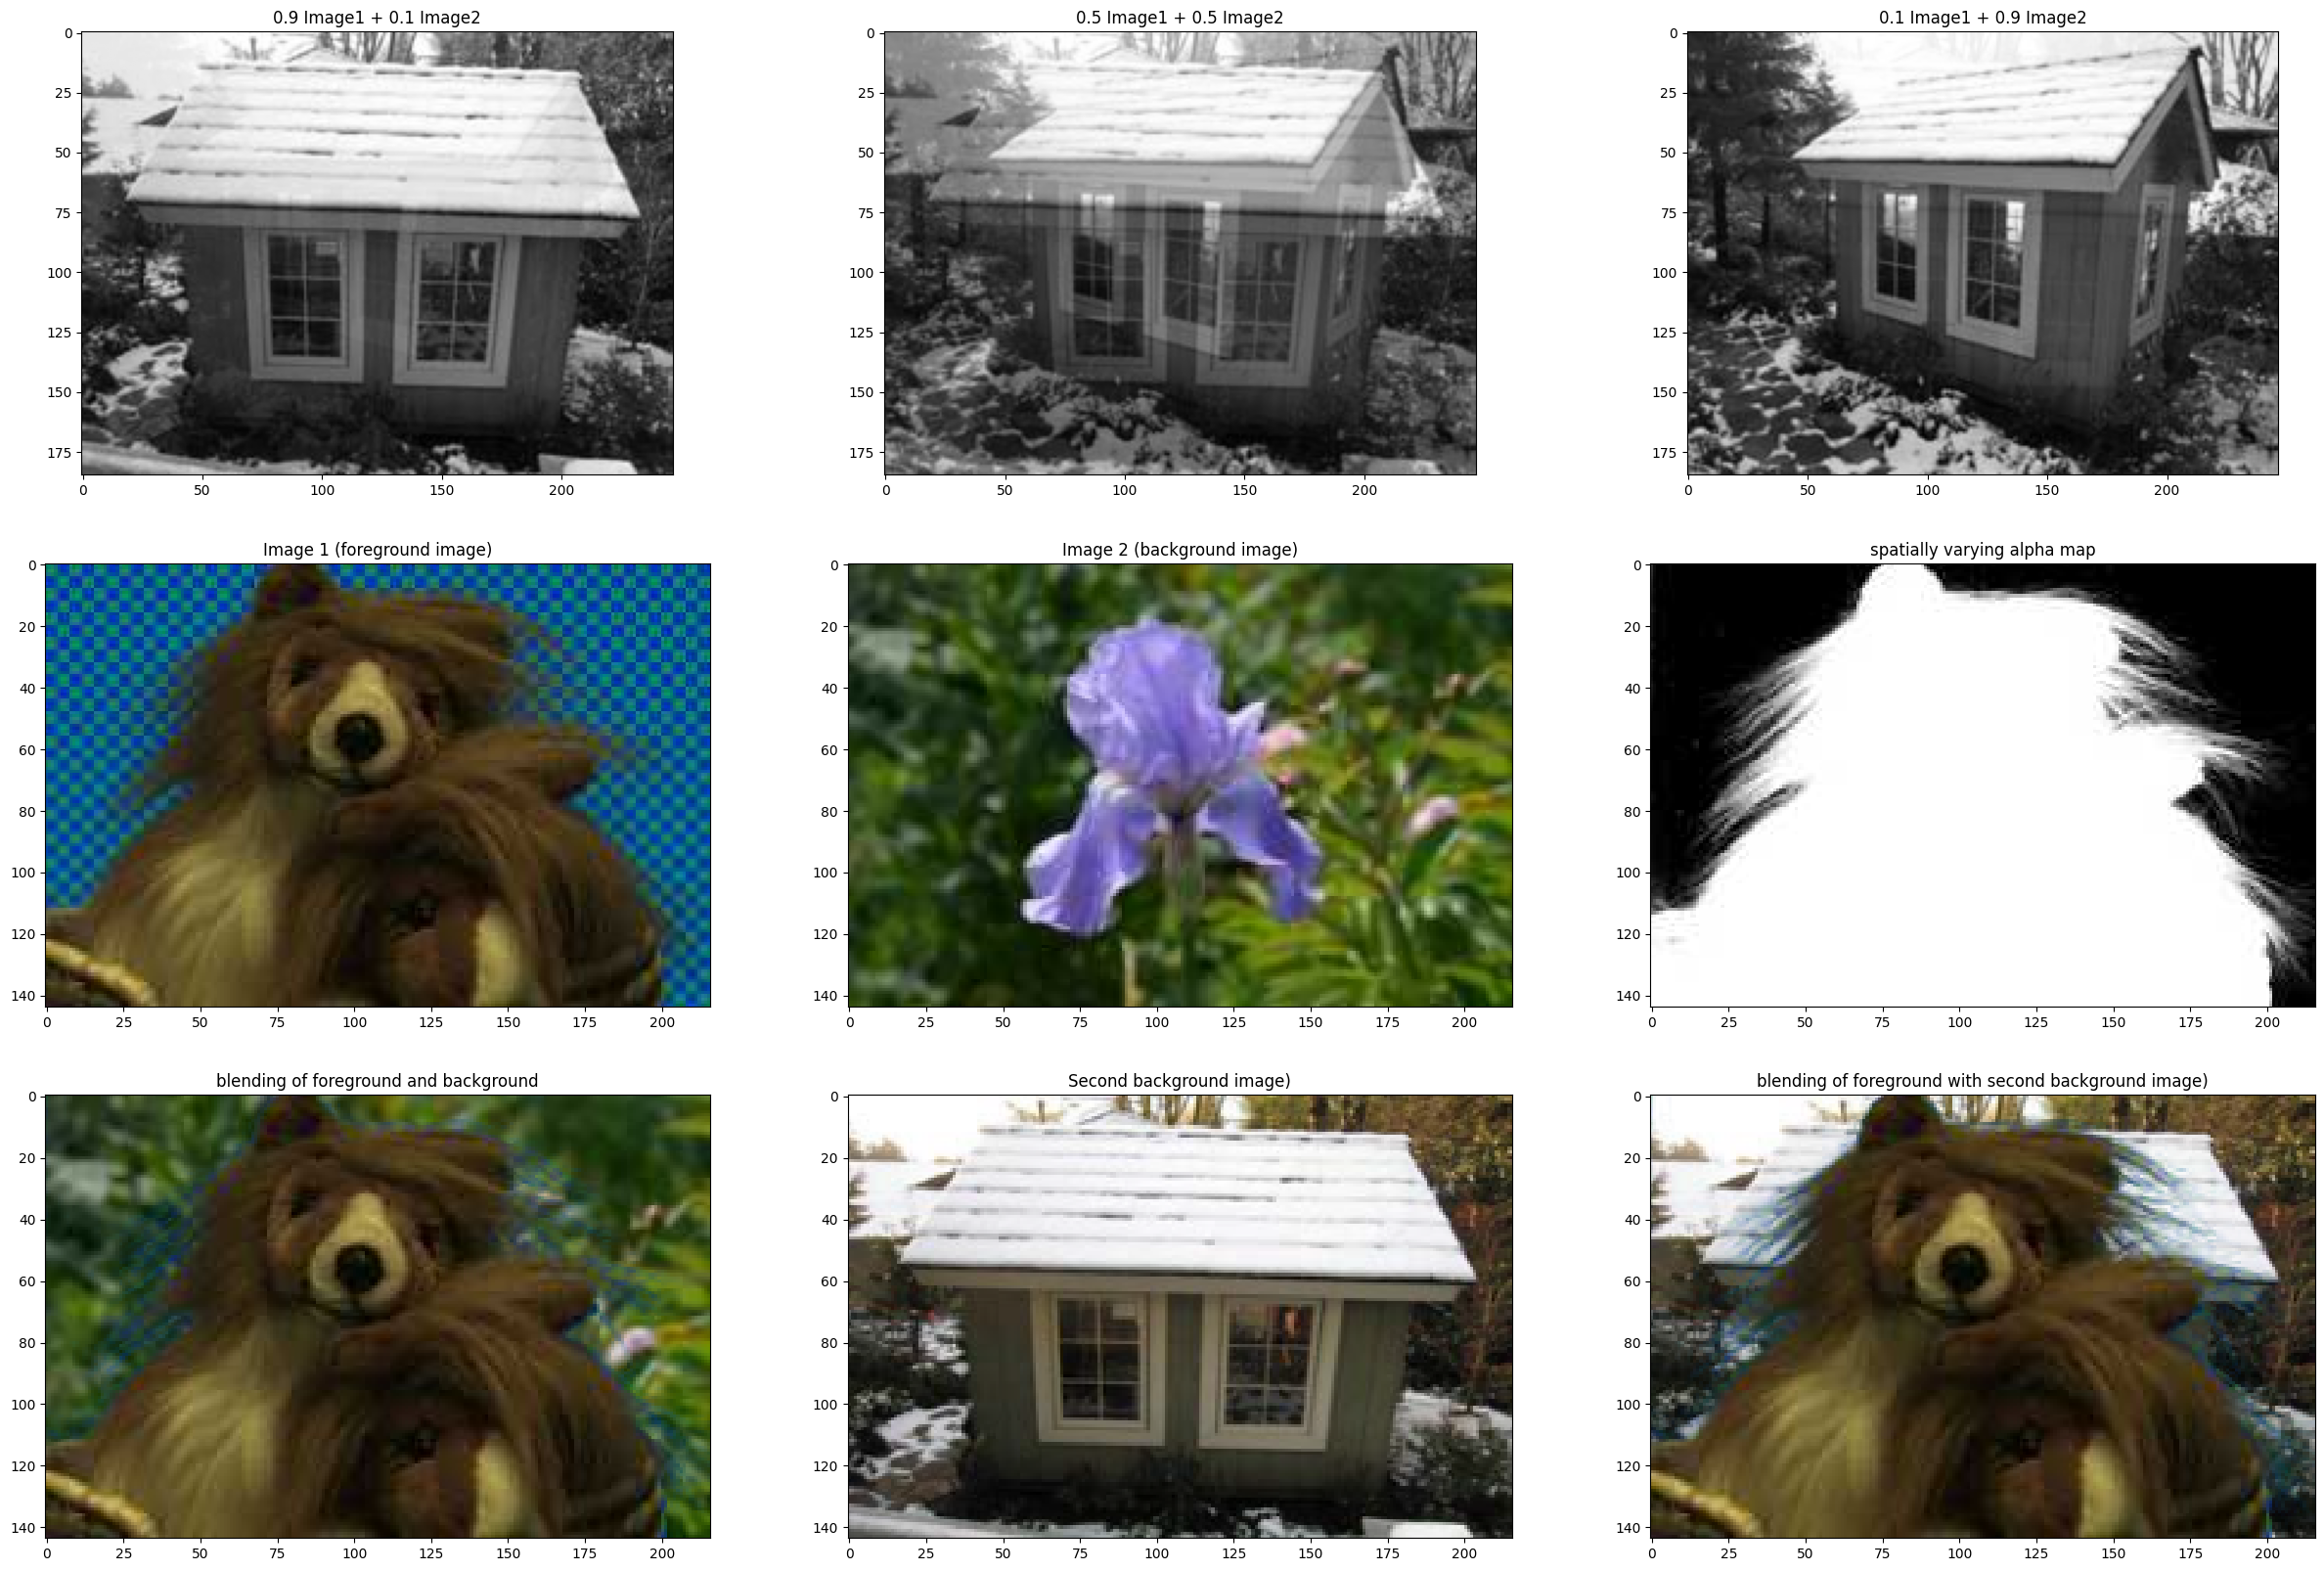

In [26]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches (30, 20)

shed_im = io.imread(data_dir + 'house_1.png')
img1 = change.rgb2gray(change.rgba2rgb(shed_im)).astype(float)

img2 = io.imread(data_dir + 'house_2.png')
img2 = change.rgb2gray(change.rgba2rgb(img2)).astype(float)

axs[0,0].imshow(linear_blend(img1, img2, 0.1), 'gray');
axs[0,0].set_title('0.9 Image1 + 0.1 Image2')

axs[0,1].imshow(linear_blend(img1, img2, 0.5), 'gray');
axs[0,1].set_title('0.5 Image1 + 0.5 Image2')

axs[0,2].imshow(linear_blend(img1, img2, 0.9), 'gray');
axs[0,2].set_title('0.1 Image1 + 0.9 Image2')


# -------------spatially varying alpha map-----------------------------------------------
img1 = io.imread(data_dir + 'Fig3_4a.jpg')
img1 = img1.astype(float)/255

alpha = io.imread(data_dir + 'Fig3_4c.jpg')
alpha = alpha.astype(float)/255

img2 = io.imread(data_dir + 'Fig3_3a.jpg')
img2 = img2.astype(float)/255

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0])) # resize function from opencv

axs[1,0].imshow(img1);
axs[1,0].set_title('Image 1 (foreground image)')

axs[1,1].imshow(img2);
axs[1,1].set_title('Image 2 (background image)')

axs[1,2].imshow(alpha, 'gray');
axs[1,2].set_title('spatially varying alpha map')

axs[2,0].imshow(linear_blend(img2, img1, alpha[:,:,None]), 'gray');
# What is None? Why am I using it? - hint: has to do with using the broadcasting feature of numpy
axs[2,0].set_title('blending of foreground and background')

#  -----------------------Example of blending with second background image
background_2 = cv2.resize(shed_im[:,:,0:3]/255, (img1.shape[1], img1.shape[0]))
axs[2,1].imshow(background_2);
axs[2,1].set_title('Second background image)')

axs[2,2].imshow(linear_blend(background_2, img1, alpha[:,:,None]), 'gray');
axs[2,2].set_title('blending of foreground with second background image)');


# Color manipulation

* How do we apply contrast and brightness pixel value manipulations to color images?

* If you are interested in learning about color, one excellent background reading about color is at http://poynton.ca/PDFs/ColorFAQ.pdf. Here we will touch on the “tip of the iceberg” of color analysis and perception. Color is a vast and deep topic.

* Wikipedia page: https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses

* Visualization of hue, value, and saturation - http://learn.leighcotnoir.com/artspeak/elements-color/hue-value-saturation/

* Can we brighten a picture by adding a constant value to all three RGB channels? **Adding the same value to each color channel increases the apparent intensity of each pixel and affects the pixel’s hue and saturation, i.e. changes the color.**

* One option is to manipulate the Y channel of the **XYZ transform** of the given RGB values and then transform it back to RGB space. (see page 90 of the second edition)

>>1. The involved transform is given by

\begin{eqnarray}
\begin{bmatrix}
X \\ Y \\ Z
\end{bmatrix} & = &
\begin{bmatrix}
0.412453 & 0.357580 & 0.180423 \\
0.212671 & 0.715160 & 0.072169 \\
0.019334 & 0.119193 & 0.950227
\end{bmatrix}
\begin{bmatrix}
R \\ G \\ B
\end{bmatrix}  
\end{eqnarray}

>>2. If we divide the XYZ values by the sum of X+Y+Z, we obtain the chromaticity coordinates
$x = X/ (X + Y + Z); y = Y /(X + Y + Z); z = Z/(X + Y + Z)$

>>3. When we tease apart luminance and chromaticity, a convenient representation for color values is **Yxy (luminance plus the two most distinctive chrominance components)**.

>>4. Modify Y to Y’ and then change Y’xy back to X’Y’Z’ and then to RGB


* **Lab color space**: (see pages 91 and 92 of the second edition) “While the XYZ color space has many convenient properties, including the ability to separate luminance from chrominance, it does not predict how well *humans perceive differences in color or luminance.* Because the response of the human visual system is roughly logarithmic (we can perceive relative luminance differences of about 1%), the CIE defined a non-linear re-mapping of the
XYZ space is called L*a*b* (CIELAB), where differences in luminance or chrominance are more perceptually uniform.”


## Code: Color brighness and contrast manipulation

Image max intensity: 1.0 pixel type float64 dimensions: (321, 481, 3)


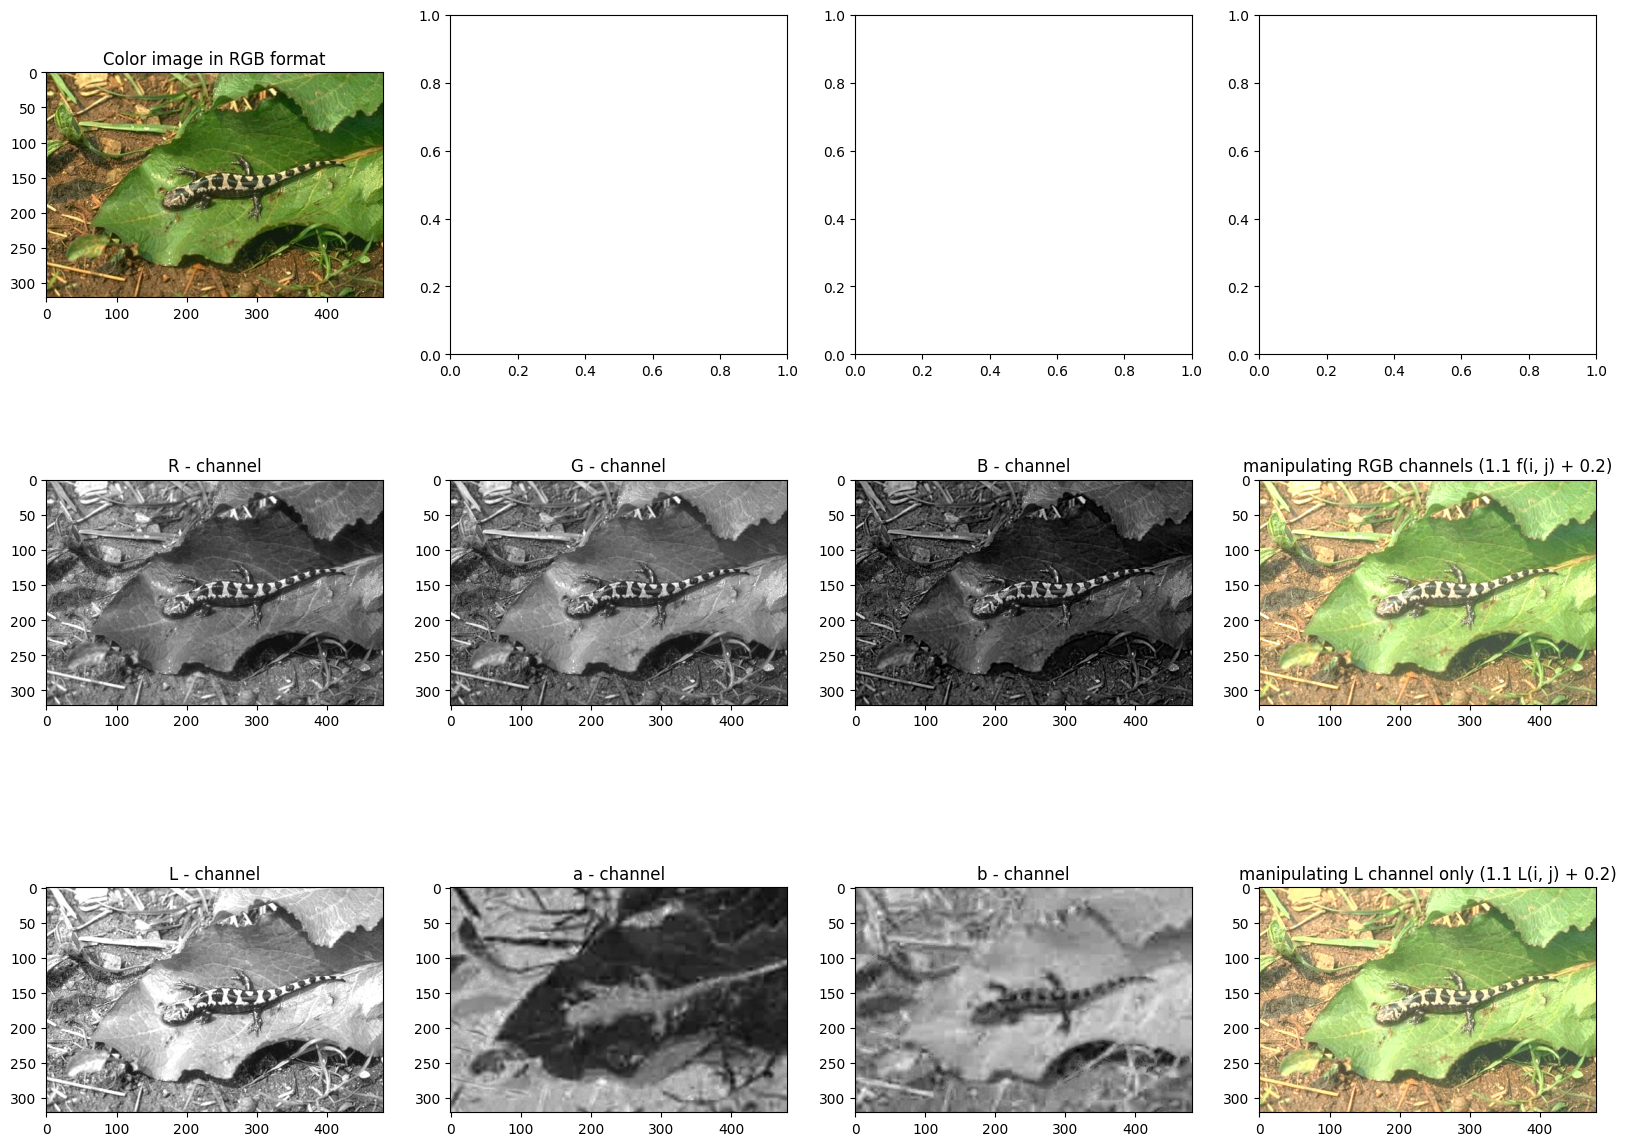

In [27]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches (20, 15)

in_im = io.imread(data_dir + 'lizard.jpg')
in_im = in_im.astype(float)
in_im /= np.max(in_im) # scales pixel values to be between 0 and 1

print('Image max intensity:', np.max(in_im), 'pixel type', in_im.dtype, 'dimensions:', in_im.shape)
# NOTE: Some color images are stored in RGBA format involving 4 channels. The 4th channel represents
# the alpha value is between 0 and 1, where 0 is fully transparent and 1 is fully opaque.
# We will ignore this fourth channel if it exists


axs[0,0].imshow(in_im);  axs[0,0].set_title('Color image in RGB format')
axs[1,0].imshow(in_im[:,:,0], 'gray'); axs[1,0].set_title('R - channel')
axs[1,1].imshow(in_im[:,:,1], 'gray'); axs[1,1].set_title('G - channel')
axs[1,2].imshow(in_im[:,:,2], 'gray'); axs[1,2].set_title('B - channel')


# Modify the RGB channels individually
out_im_rgb = np.zeros((in_im.shape[0], in_im.shape[1], 3))
out_im_rgb[:,:,0] = change_contrast(change_brightness(in_im[:,:,0], 0.2), 1.1);
out_im_rgb[:,:,1] = change_contrast(change_brightness(in_im[:,:,1], 0.2), 1.1);
out_im_rgb[:,:,2] = change_contrast(change_brightness(in_im[:,:,2], 0.2), 1.1);

axs[1,3].imshow(out_im_rgb); axs[1,3].set_title ('manipulating RGB channels (1.1 f(i, j) + 0.2)');


# Modify the L channel of Lab space
out_im_Lab = change.rgb2lab(in_im)
# manipulate the L channel. - L ranges between 0 and 100
out_im_Lab[:,:,0] = change_contrast(change_brightness(out_im_Lab[:,:,0]/100, 0.2), 1.1) * 100.0
out_im_rgb = change.lab2rgb(out_im_Lab)

axs[2,0].imshow(out_im_Lab[:,:,0], 'gray'); axs[2,0].set_title('L - channel')
axs[2,1].imshow(out_im_Lab[:,:,1], 'gray'); axs[2,1].set_title('a - channel')
axs[2,2].imshow(out_im_Lab[:,:,2], 'gray'); axs[2,2].set_title('b - channel')
axs[2,3].imshow(out_im_rgb); axs[2,3].set_title('manipulating L channel only (1.1 L(i, j) + 0.2)');



# Image normalization operations for deep learning

* Divide each pixel of the input image, $f(i,j)$, by the maximum possible value of a pixel, i.e., 255, so that the RGB values of each pixel are between 0 and 1. Let us call this image $f_{norm}$.

* Compute the mean and standard deviation of all the pixels in the image, $f_{norm}$. Subtract the mean value from each pixel and divide the standard deviation. Let us call this image $f_{std}$.

>> Sometimes mean and standard deviation values from the well-known dataset ImageNet are used. ImageNet values: MEAN = np.array([0.485, 0.456, 0.406]); STD = np.array([0.229, 0.224, 0.225])

* The resulting image has pixel values that can be negative.

* Add 3 to the resulting image, $f_{std}$, and divide by 6 to rescale the pixel value between 0 and 1. Clip pixel values outside of 0 and 1.

* This transformation aligns the mean and standard deviations of the color channels and helps speed up the convergence of deep learning methods.


## Code: Draw histograms of color values in a color image

In [28]:
def draw_color_histogram (image, axs) :
    histogram, bin_edges = np.histogram(image[:, :, 0], bins=50)
    axs.plot(bin_edges[0:-1], histogram, color="red")

    histogram, bin_edges = np.histogram(image[:, :, 1], bins=50)
    axs.plot(bin_edges[0:-1], histogram, color="green")

    histogram, bin_edges = np.histogram(image[:, :, 2], bins=50)
    axs.plot(bin_edges[0:-1], histogram, color="blue")

    axs.set_xlabel("Color value")
    axs.set_ylabel("Pixel Counts")


## Code: Normalize images for deep learning

Mean:  [0.28 0.34 0.22] Std:  [0.17 0.14 0.25]
Image (min, max) intensity: -2.352173850298458 4.615066010545318 pixel type float64 dimensions: (128, 192, 3)


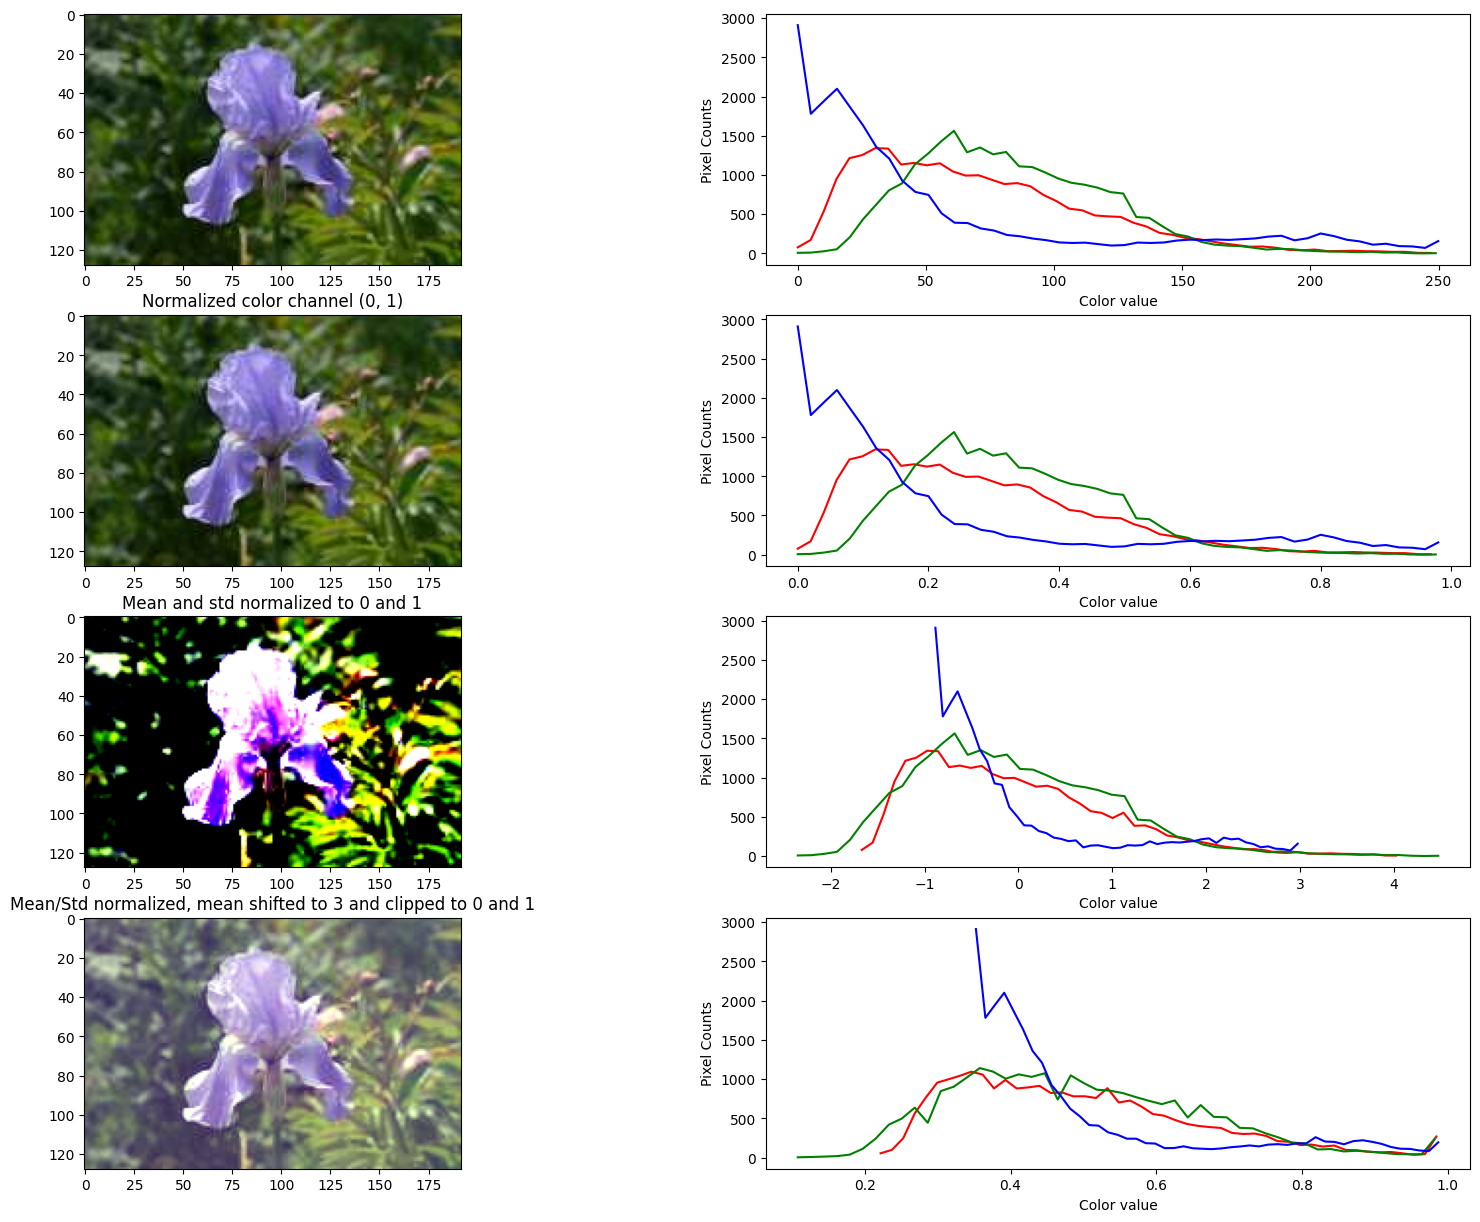

In [29]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches (20, 15)

in_im = io.imread(data_dir + 'Fig3_3a.jpg')

axs[0,0].imshow(in_im)
draw_color_histogram (in_im, axs[0,1])

# -----------------------------------normalize the range to 0 and 1-----------------------------------
in_im = in_im.astype(float)
in_im_norm = in_im/np.max(in_im) # scales pixel values to be between 0 and 1

axs[1,0].imshow(in_im_norm)
axs[1,0].set_title('Normalized color channel (0, 1)')
draw_color_histogram (in_im_norm, axs[1,1])

# -----------------------------------normalize the values to have zero mean and unit variance ----------------------
mean = np.mean(in_im_norm, axis=(0,1))
std = np.std(in_im_norm, axis=(0,1))
print('Mean: ', mean, 'Std: ', std)
# Imagenet values
# MEAN = np.array([0.485, 0.456, 0.406])
# STD = np.array([0.229, 0.224, 0.225])

in_im_std = (in_im_norm - mean[None, None, :])/std[None, None, :]

print('Image (min, max) intensity:', np.min(in_im_std), np.max(in_im_std), 'pixel type', in_im_std.dtype, 'dimensions:', in_im_std.shape)
axs[2,0].imshow(in_im_std)
axs[2,0].set_title ('Mean and std normalized to 0 and 1')
draw_color_histogram (in_im_std, axs[2,1])
#----------------------------------- rescale values to be between 0 and 1 -----------------------------------
in_im_std_clipped = (in_im_std + 3)/6
in_im_std_clipped = np.where(in_im_std_clipped > 1, 1, in_im_std_clipped)
in_im_std_clipped = np.where(in_im_std_clipped < 0, 0, in_im_std_clipped)

axs[3,0].imshow(in_im_std_clipped);
axs[3,0].set_title ('Mean/Std normalized, mean shifted to 3 and clipped to 0 and 1')
draw_color_histogram (in_im_std_clipped, axs[3,1])




# Histogram equalization

* The goal is to turn the histogram shape into a flatter one, resulting in more contrast images.

* One interpretation is probabilistic. Consider only one channel for now. The random variable is that channel's pixel value, $I$. If one were to normalize the histogram of that channel to sum to 1, then we can consider it to be a probability distribution, $h(I)$. The goal is to transform the pixel values using a function, $f(I)$ so that the distribution of the converted pixel value is uniform.

* From $h(I)$ form the cummulative histogram, $c(I) = \sum_{i=0}^{i=I} h(i)$

* The optimal pixel value transformation function for maximum contrast is this cummulative histogram: $f(I) = c(I)$.
> see https://courses.cs.duke.edu/cps274/fall14/notes/HistogramEqualization.pdf

* https://en.wikipedia.org/wiki/Histogram_equalization


## Code: Histogram equalization

In [30]:
# numpy array indexing snippet that can be useful
a = np.array([[1, 2], [3, 4]])
b = np.array([0, 10, 20, 30, 40])
# using a as an index into b -- output is of the shape of a
print('a=\n', a, '\nb=\n', b, '\nb(a)=\n', b[a])

a=
 [[1 2]
 [3 4]] 
b=
 [ 0 10 20 30 40] 
b(a)=
 [[10 20]
 [30 40]]


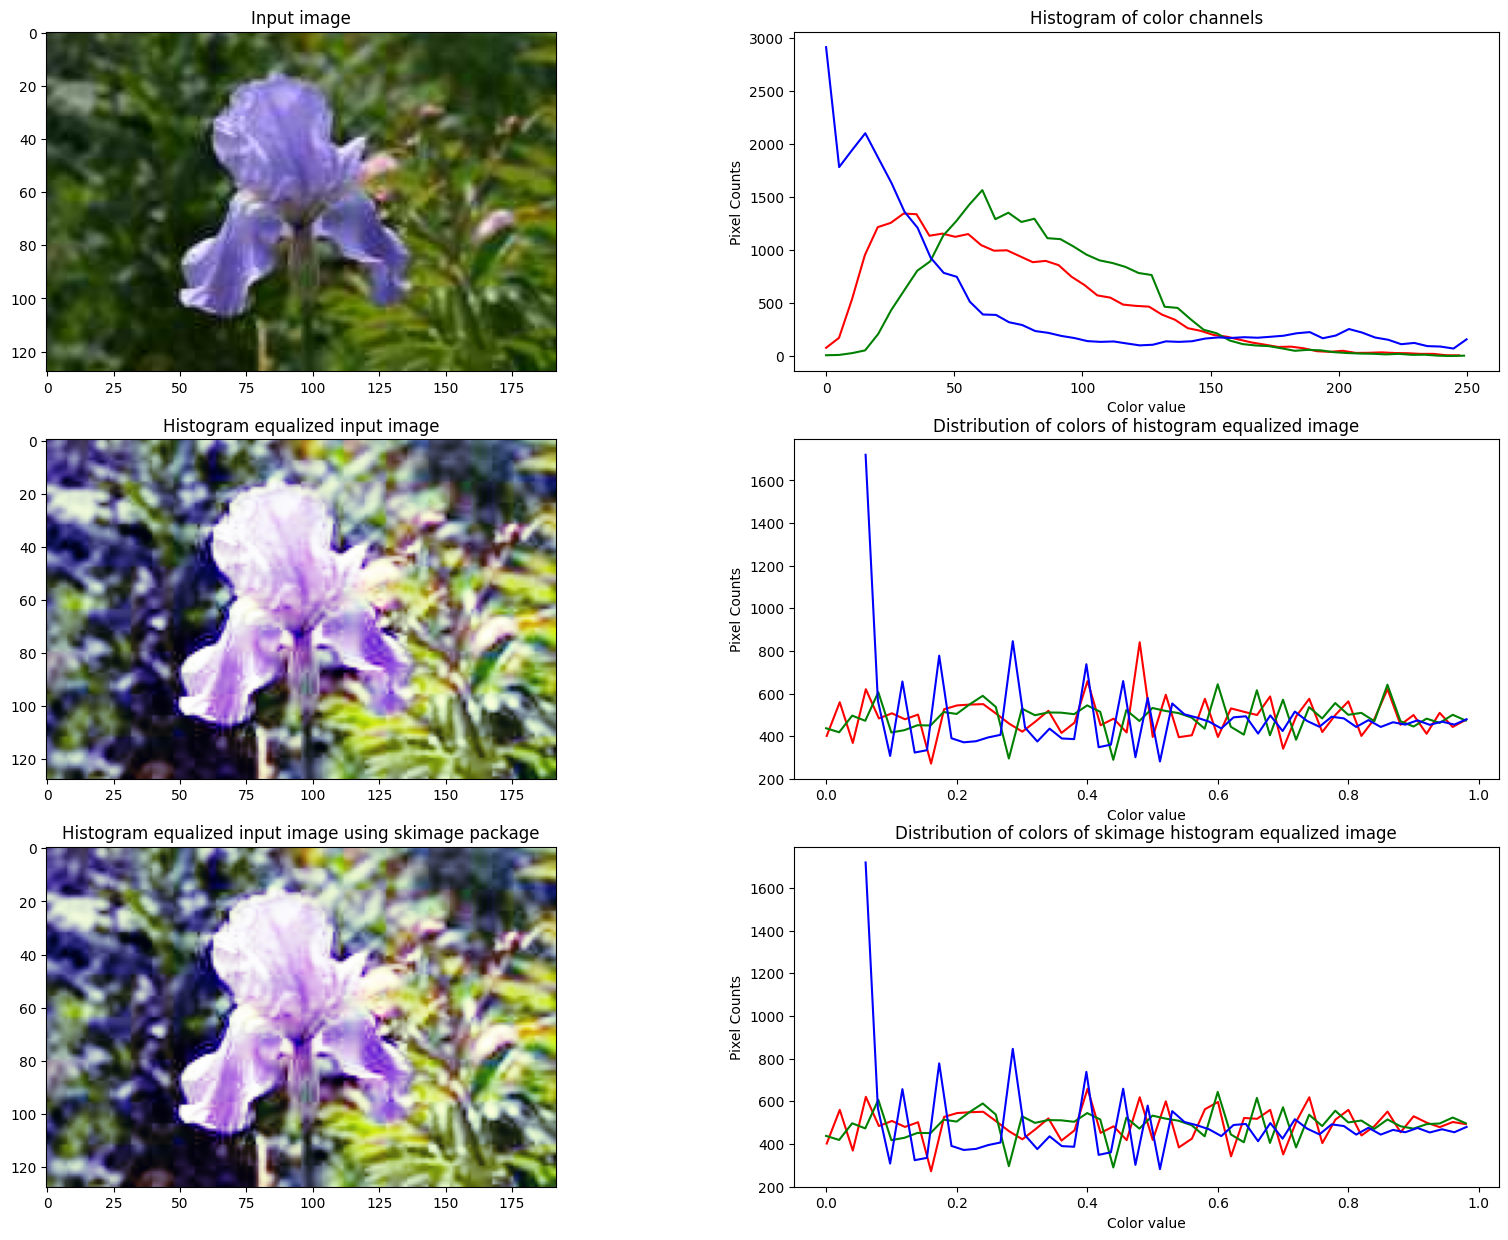

In [31]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches (20, 15)

in_im = io.imread(data_dir + 'Fig3_3a.jpg')

axs[0,0].imshow(in_im)
axs[0,0].set_title ('Input image')
draw_color_histogram (in_im, axs[0,1])
axs[0,1].set_title ('Histogram of color channels')


histogram_r, bin_edges_r = np.histogram(in_im[:, :, 0], bins=256)
#print(histogram_r.shape)
histogram_r = histogram_r/np.sum(histogram_r)
cummulative_histogram_r = np.cumsum(histogram_r)

histogram_g, bin_edges_g = np.histogram(in_im[:, :, 1], bins=256)
histogram_g = histogram_g/histogram_g.sum()
cummulative_histogram_g = np.cumsum(histogram_g)

histogram_b, bin_edges_b = np.histogram(in_im[:, :, 2], bins=256)
histogram_b = histogram_b/histogram_b.sum()
cummulative_histogram_b = np.cumsum(histogram_b)

# ------------transforming the pixel values using cummulative histogram--------
hist_norm_im = np.zeros(in_im.shape)
hist_norm_im[:, :, 0] = cummulative_histogram_r[in_im[:, :, 0]]
hist_norm_im[:, :, 1] = cummulative_histogram_g[in_im[:, :, 1]]
hist_norm_im[:, :, 2] = cummulative_histogram_b[in_im[:, :, 2]]
#Notice how the indexing is used to circumvent the explicit use of for loops.

axs[1,0].imshow(hist_norm_im)
axs[1,0].set_title ('Histogram equalized input image')

draw_color_histogram (hist_norm_im, axs[1,1])
axs[1,1].set_title ('Distribution of colors of histogram equalized image')

# -- using code from skimage module --
from skimage import exposure
hist_norm_im[:,:,0] = exposure.equalize_hist(in_im[:,:,0])
hist_norm_im[:,:,1] = exposure.equalize_hist(in_im[:,:,1])
hist_norm_im[:,:,2] = exposure.equalize_hist(in_im[:,:,2])


axs[2,0].imshow(hist_norm_im)
axs[2,0].set_title ('Histogram equalized input image using skimage package')

draw_color_histogram (hist_norm_im, axs[2,1])
axs[2,1].set_title ('Distribution of colors of skimage histogram equalized image');



# Assignment - Lab histogram equalization

The above code for histogram equalization performs changes in all three color channels individually. As you can see from the results, the process distorts the colors of the leaves in the background, and some of them take on a purple color. In this activity, you will experiment with a histogram equalization process that should preserve the colors by operating in a different color space.

Insert code fragments in the code BELOW to perform histogram equalization only on the L-channel of the Lab color space. First, you compute the image's L, a, and b channels. Then perform histogram equalization on the L-channel. Finally, convert back to RGB format and display the image.

There are three places where you have to enter code fragments.

Submit your code as a text file and a pdf of the screenshot of the output image and its histogram.

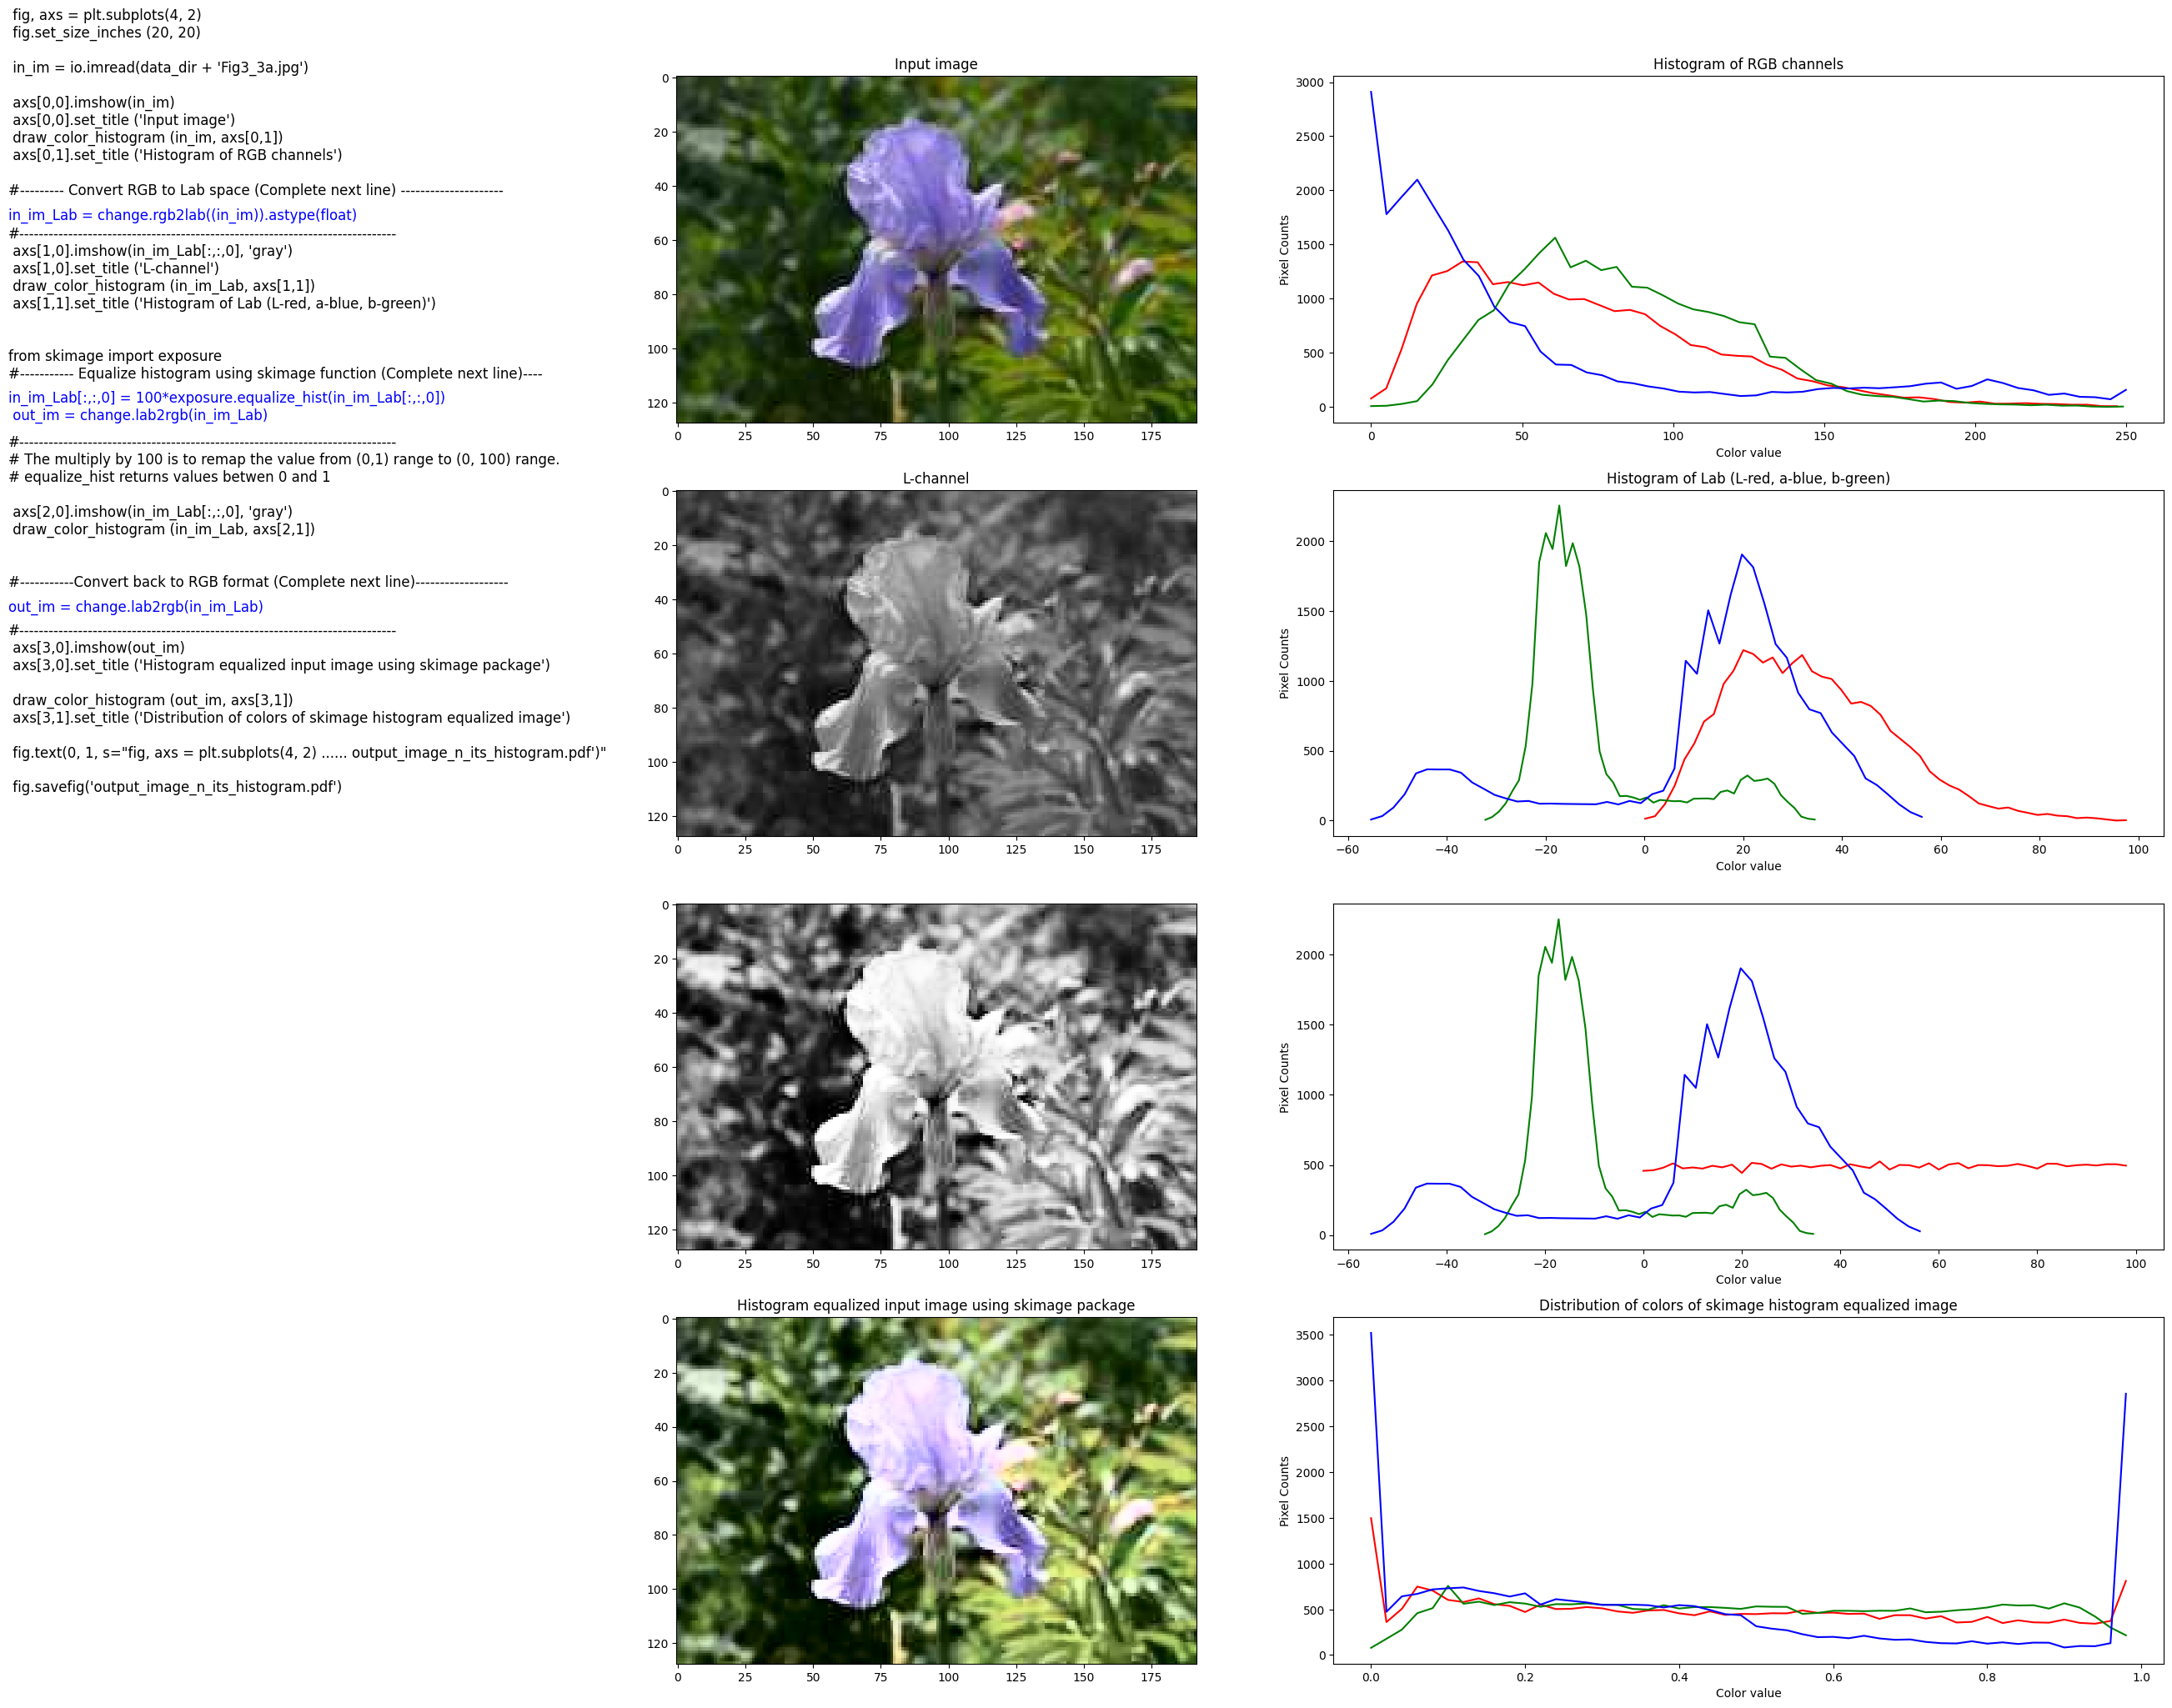

In [166]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches (20, 20)

in_im = io.imread(data_dir + 'Fig3_3a.jpg')

axs[0,0].imshow(in_im)
axs[0,0].set_title ('Input image')
draw_color_histogram (in_im, axs[0,1])
axs[0,1].set_title ('Histogram of RGB channels')

#--------- Convert RGB to Lab space (Complete next line) ---------------------
in_im_Lab = change.rgb2lab((in_im)).astype(float)
#-----------------------------------------------------------------------------
axs[1,0].imshow(in_im_Lab[:,:,0], 'gray')
axs[1,0].set_title ('L-channel')
draw_color_histogram (in_im_Lab, axs[1,1])
axs[1,1].set_title ('Histogram of Lab (L-red, a-blue, b-green)')


from skimage import exposure
#----------- Equalize histogram using skimage function (Complete next line)----
in_im_Lab[:,:,0] = 100*exposure.equalize_hist(in_im_Lab[:,:,0])
#-----------------------------------------------------------------------------
# The multiply by 100 is to remap the value from (0,1) range to (0, 100) range.
# equalize_hist returns values betwen 0 and 1

axs[2,0].imshow(in_im_Lab[:,:,0], 'gray')
draw_color_histogram (in_im_Lab, axs[2,1])


#-----------Convert back to RGB format (Complete next line)-------------------
out_im = change.lab2rgb(in_im_Lab)
#-----------------------------------------------------------------------------
axs[3,0].imshow(out_im)
axs[3,0].set_title ('Histogram equalized input image using skimage package')

draw_color_histogram (out_im, axs[3,1])
axs[3,1].set_title ('Distribution of colors of skimage histogram equalized image')

fig.text(-0.3, 0.9, s=" fig, axs = plt.subplots(4, 2)\n fig.set_size_inches (20, 20)\n\n in_im = io.imread(data_dir + 'Fig3_3a.jpg')\n\n axs[0,0].imshow(in_im)\n axs[0,0].set_title ('Input image')\n draw_color_histogram (in_im, axs[0,1])\n axs[0,1].set_title ('Histogram of RGB channels')\n\n#--------- Convert RGB to Lab space (Complete next line) ---------------------\n ", fontsize=12)
fig.text(-0.3, 0.885, s="in_im_Lab = change.rgb2lab((in_im)).astype(float)\n", color="blue", fontsize=12)

fig.text(-0.3, 0.79, s="#-----------------------------------------------------------------------------\n axs[1,0].imshow(in_im_Lab[:,:,0], 'gray')\n axs[1,0].set_title ('L-channel')\n draw_color_histogram (in_im_Lab, axs[1,1])\n axs[1,1].set_title ('Histogram of Lab (L-red, a-blue, b-green)')\n\n\nfrom skimage import exposure\n#----------- Equalize histogram using skimage function (Complete next line)----\n ", fontsize=12)

fig.text(-0.3, 0.765, s="in_im_Lab[:,:,0] = 100*exposure.equalize_hist(in_im_Lab[:,:,0])\n out_im = change.lab2rgb(in_im_Lab)\n", color="blue", fontsize=12)
fig.text(-0.3, 0.665, s="#-----------------------------------------------------------------------------\n# The multiply by 100 is to remap the value from (0,1) range to (0, 100) range.\n# equalize_hist returns values betwen 0 and 1\n\n axs[2,0].imshow(in_im_Lab[:,:,0], 'gray')\n draw_color_histogram (in_im_Lab, axs[2,1])\n\n\n#-----------Convert back to RGB format (Complete next line)-------------------\n ", fontsize=12)
fig.text(-0.3, 0.6499, s="out_im = change.lab2rgb(in_im_Lab)\n", color="blue", fontsize=12)
fig.text(-0.3, 0.55, s="#-----------------------------------------------------------------------------\n axs[3,0].imshow(out_im)\n axs[3,0].set_title ('Histogram equalized input image using skimage package')\n\n draw_color_histogram (out_im, axs[3,1])\n axs[3,1].set_title ('Distribution of colors of skimage histogram equalized image')\n\n fig.text(0, 1, s=\"fig, axs = plt.subplots(4, 2) ...... output_image_n_its_histogram.pdf')\"\n\n fig.savefig('output_image_n_its_histogram.pdf') ", ha="left",  va="bottom", fontsize=12)

plt.tight_layout()
fig.savefig('output_image_n_its_histogram_code.pdf')
